In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [193]:
# Link = https://www.kaggle.com/imdevskp/ebola-outbreak-20142016-complete-dataset

In [194]:
# Let's read in the data from kaggle
world_data = pd.read_csv('ebola-outbreak-20142016-complete-dataset/ebola_2014_2016_clean.csv')

In [195]:
# Let's set the Date data to Datetime
world_data['Date'] = pd.to_datetime(world_data['Date'])

In [253]:
# Let's add a column propable and suspected cases and deaths
world_data['Unconfirmed Cases'] = world_data['No. of confirmed, probable and suspected cases'] - world_data['No. of confirmed cases']
world_data['Unconfirmed Deaths'] = world_data['No. of confirmed, probable and suspected deaths'] - world_data['No. of confirmed, probable and suspected deaths']

## Ebola Data on Each Country

In [254]:
usa_data = world_data[world_data['Country'] == 'United States of America']
uk_data = world_data[world_data['Country'] == 'United Kingdom']
nigeria_data = world_data[world_data['Country'] == 'Nigeria']
sierra_leone_data = world_data[world_data['Country'] == 'Sierra Leone']
liberia_data = world_data[world_data['Country'] == 'Liberia']
senegal_data = world_data[world_data['Country'] == 'Senegal']
spain_data = world_data[world_data['Country'] == 'Spain']
mali_data = world_data[world_data['Country'] == 'Mali']
italy_data = world_data[world_data['Country'] == 'Italy']

### Clean the Data

In [255]:
# This funciton will make the cleaning way easier
def clean_the_data(df):
    df.set_index(df['Date'], inplace=True)
    df.drop(columns=['Country', 'Date'], inplace=True)

In [256]:
# Aaaaand we clean it call
clean_the_data(usa_data)
clean_the_data(uk_data)
clean_the_data(nigeria_data)
clean_the_data(sierra_leone_data)
clean_the_data(liberia_data)
clean_the_data(senegal_data)
clean_the_data(spain_data)
clean_the_data(mali_data)
clean_the_data(italy_data)

C:\Users\nolan\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [257]:
liberia_data[liberia_data.index.year == 2016]

,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths",Unconfirmed Cases,Unconfirmed Deaths
Date,,,,,,,,,,
2016-03-23,NaN,NaN,9.0,9.0,NaN,NaN,3.0,3.0,0.0,0.0
2016-03-23,5636.0,1879.0,3151.0,10666.0,NaN,NaN,NaN,4806.0,7515.0,0.0
2016-03-23,0.0,3.0,2.0,5.0,NaN,3.0,1.0,4.0,3.0,0.0


### Plot the Data

In [266]:
# This function will make the plots pretty easy too
def plot_all_cases_and_deaths(df, title):
    plt.figure(figsize=(16, 12))
    plt.title(title, fontsize=37)
    plt.xlabel('Date', fontsize=32)
    plt.ylabel('Number of People', fontsize=32)
    
    plt.plot(df.index, df['No. of confirmed, probable and suspected cases'], label='Cases')
    plt.plot(df.index, df['No. of confirmed, probable and suspected deaths'], label='Deaths')
    
#     plt.plot(df.index, df['No. of confirmed cases'], label='Confirmed Cases', color='blue')
#     plt.plot(df.index, df['Unconfirmed Cases'], label='Suspected/Probable Cases', color='blue', linestyle='dashed')    
    
#     plt.plot(df.index, df['No. of confirmed deaths'], label='Confirmed Deaths', color='red')
#     plt.plot(df.index, df['Unconfirmed Deaths'], label='Suspected/Probable Deaths', color='red', linestyle='dashed')
    
    plt.legend()

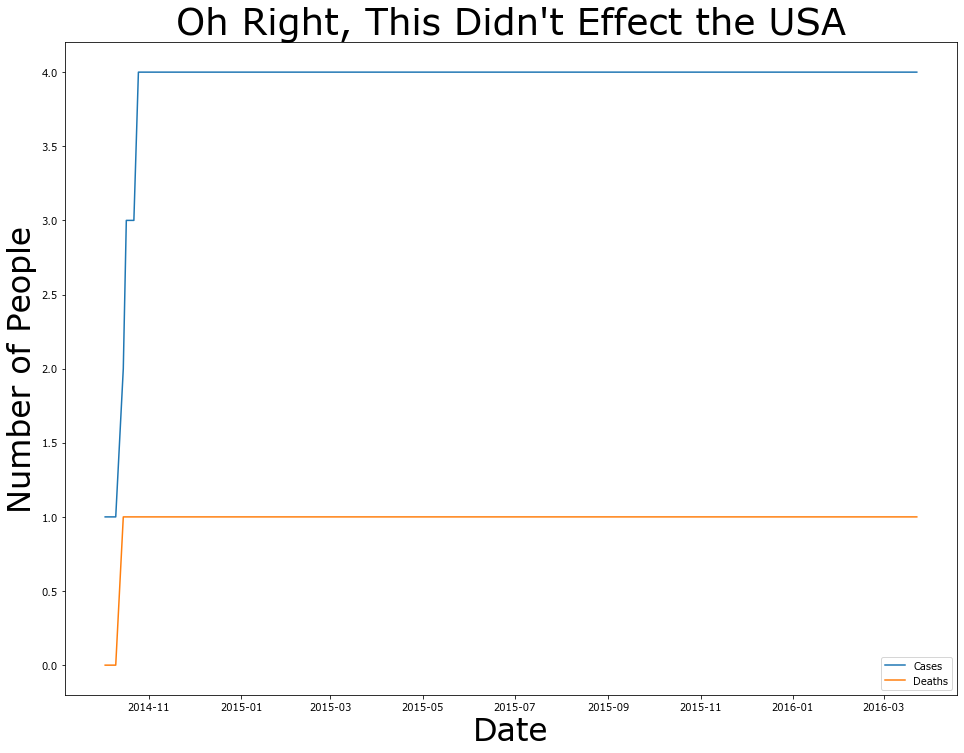

In [267]:
# USA Plot
plot_all_cases_and_deaths(usa_data, "Oh Right, This Didn't Effect the USA")

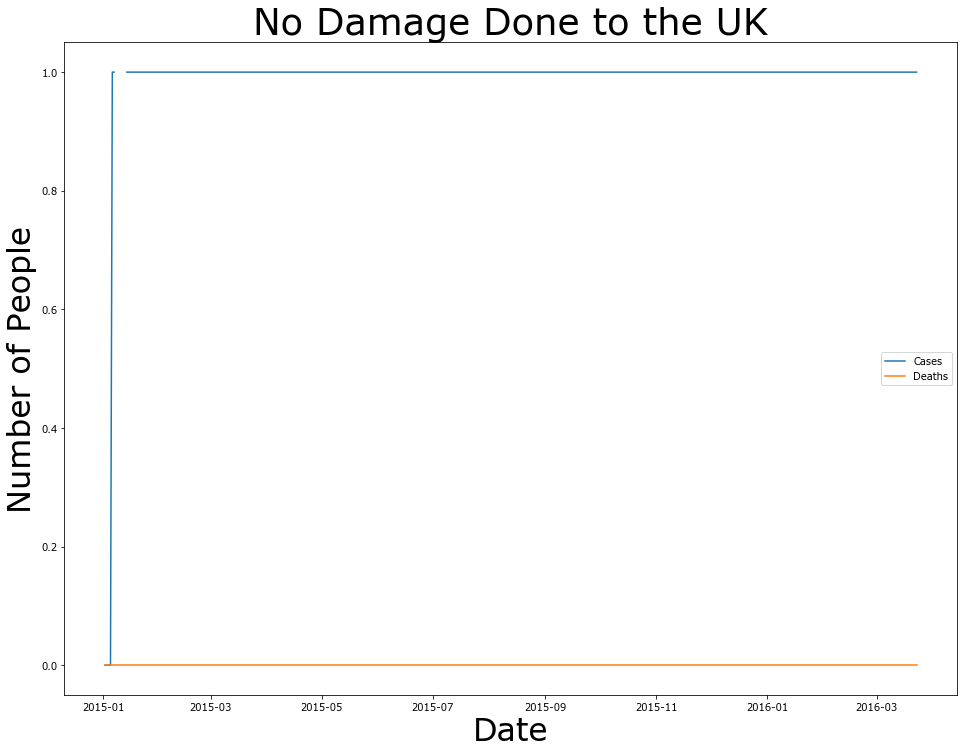

In [270]:
plot_all_cases_and_deaths(uk_data, 'No Damage Done to the UK')

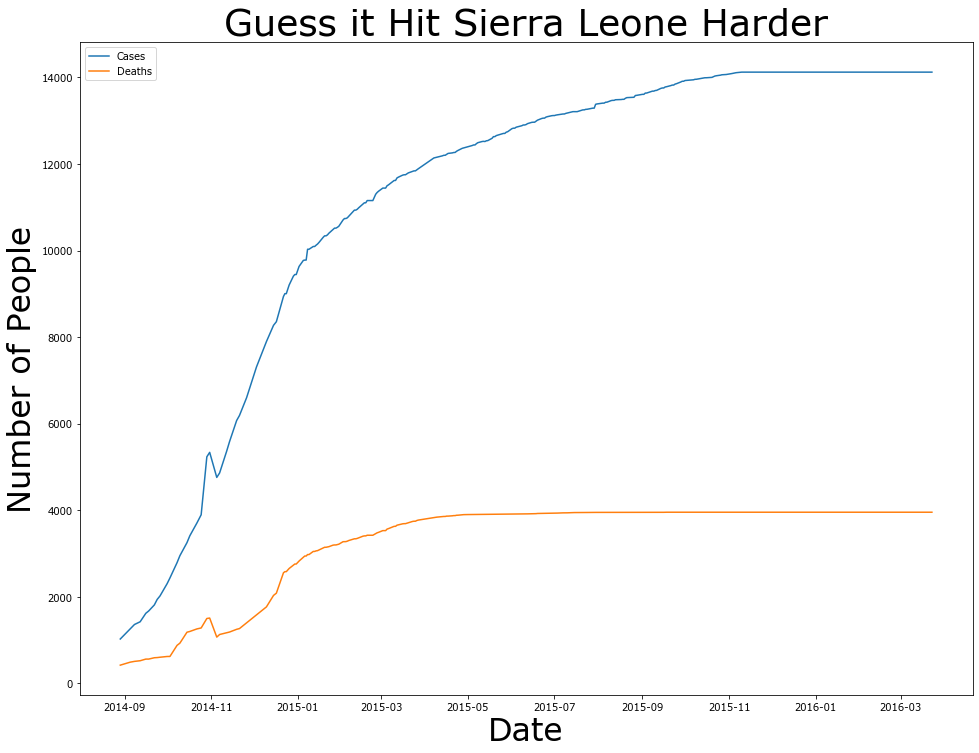

In [271]:
plot_all_cases_and_deaths(sierra_leone_data, 'Guess it Hit Sierra Leone Harder')

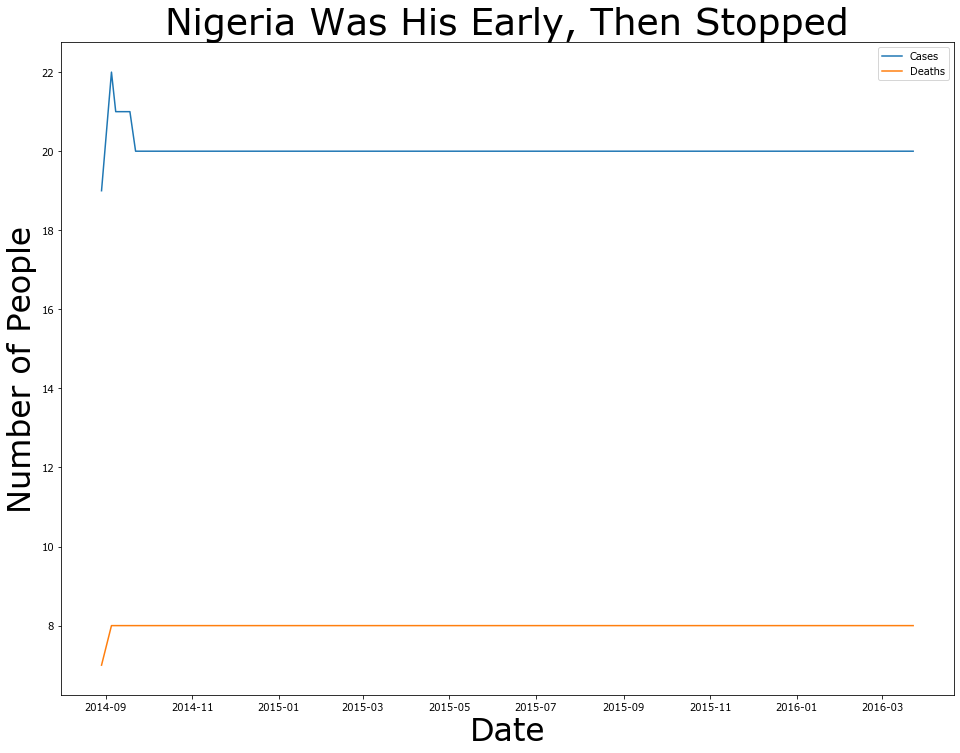

In [272]:
plot_all_cases_and_deaths(nigeria_data, 'Nigeria Was His Early, Then Stopped')

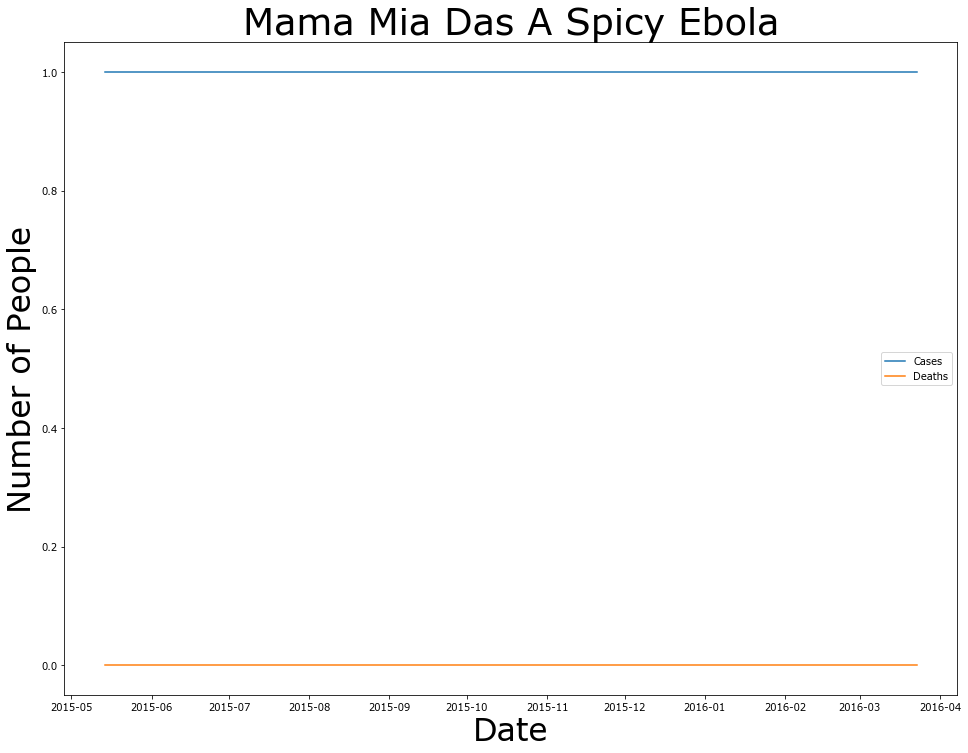

In [273]:
plot_all_cases_and_deaths(italy_data, 'Mama Mia Das A Spicy Ebola')

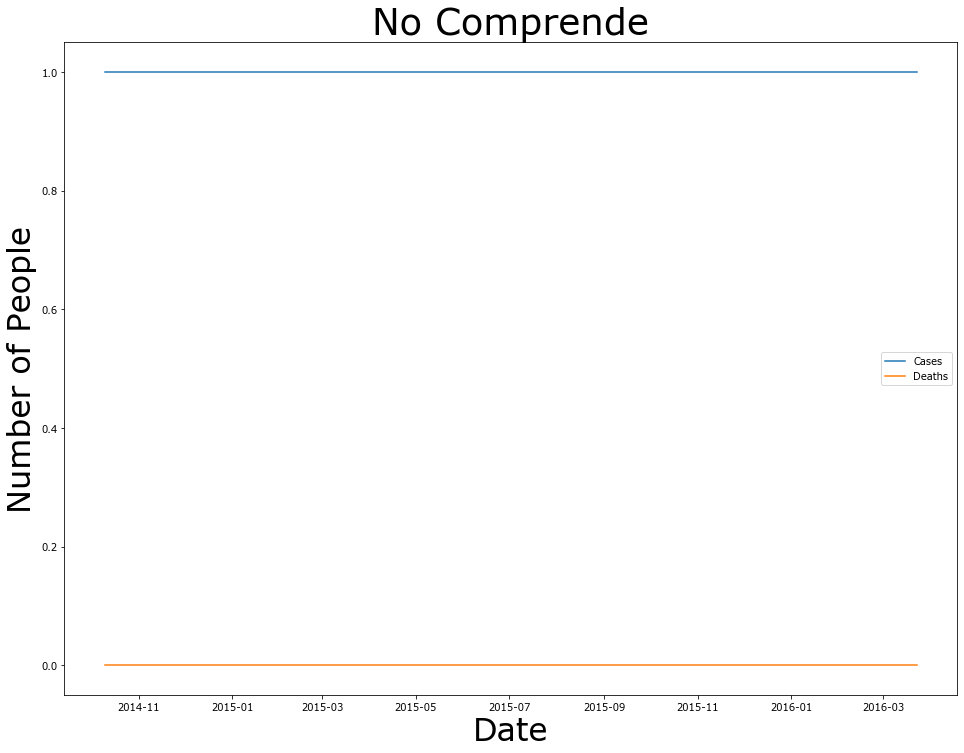

In [274]:
plot_all_cases_and_deaths(spain_data, 'No Comprende')

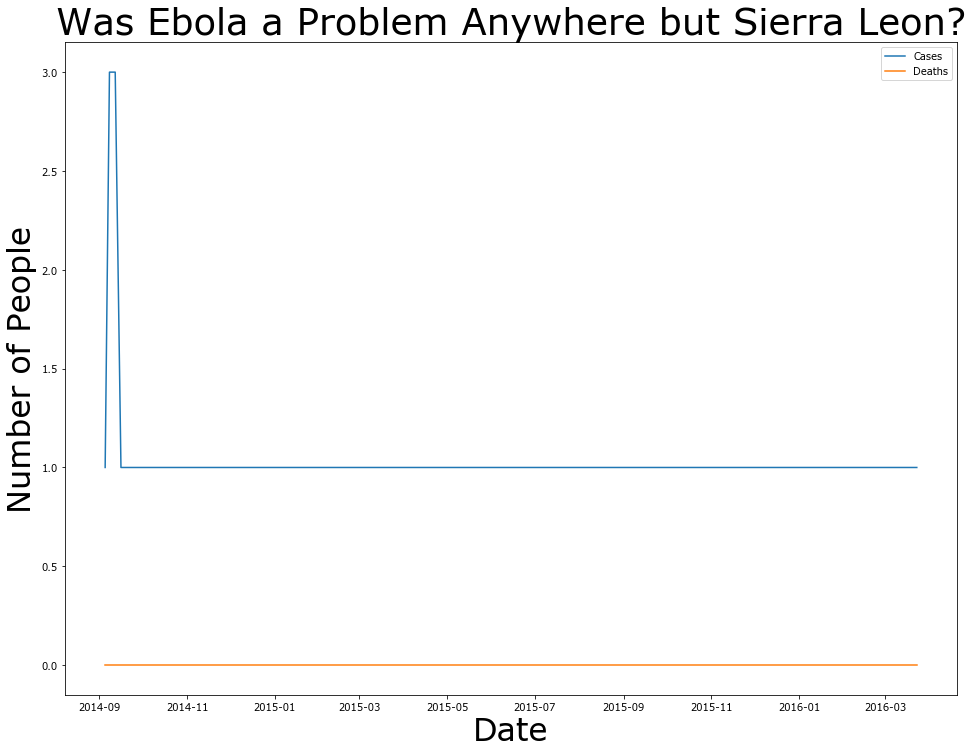

In [275]:
plot_all_cases_and_deaths(senegal_data, "Was Ebola a Problem Anywhere but Sierra Leon?")

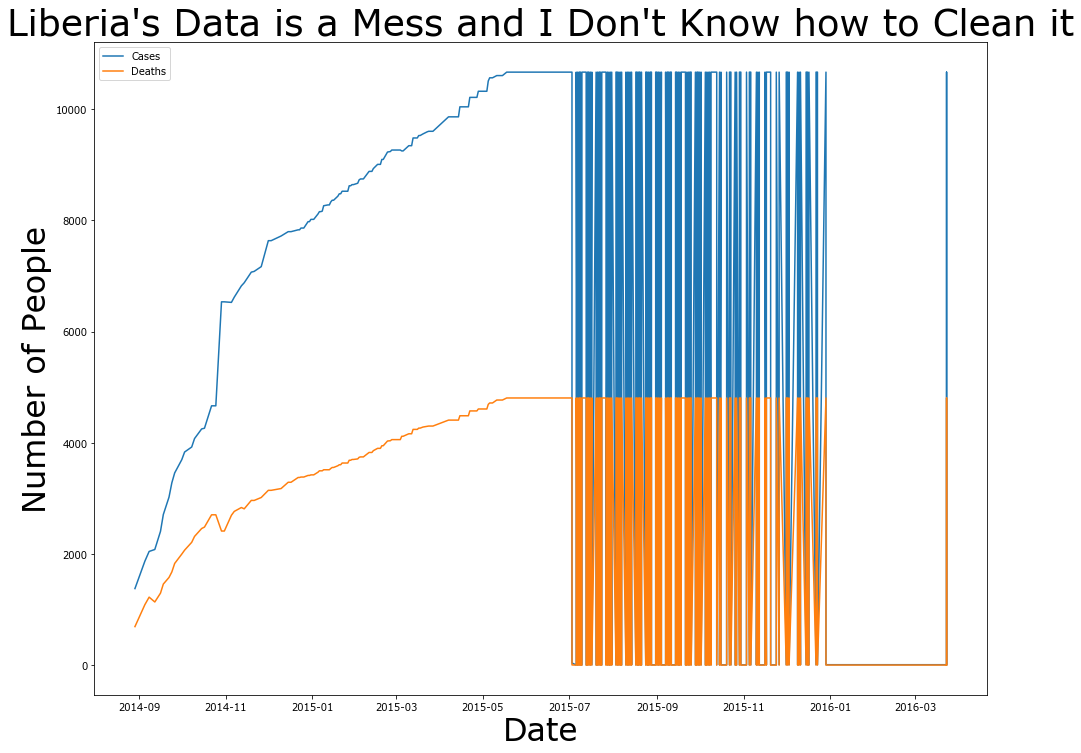

In [276]:
plot_all_cases_and_deaths(liberia_data, "Liberia's Data is a Mess and I Don't Know how to Clean it")

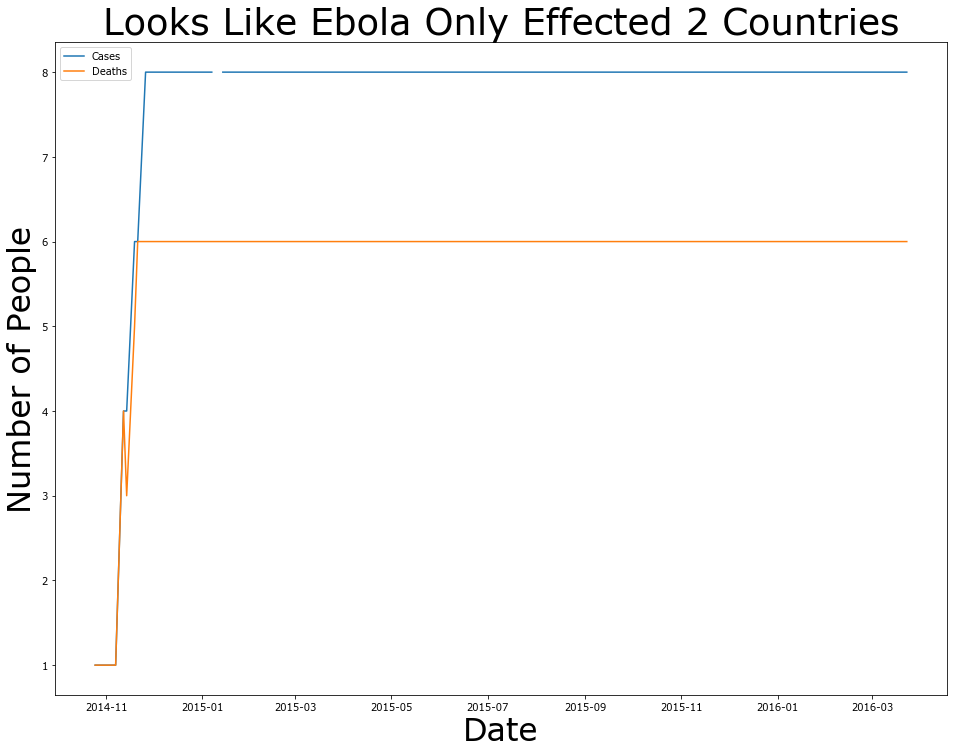

In [277]:
plot_all_cases_and_deaths(mali_data, 'Looks Like Ebola Only Effected 2 Countries')

## Let's Have A Look At The Total

In [363]:
# This enables a groupby that doesn't add up the same month of different years
world_data['Year-Month'] = world_data['Date'].dt.to_period('M').astype(str)

In [365]:
monthly_world_data = pd.DataFrame(world_data['No. of confirmed, probable and suspected cases'].groupby(world_data['Year-Month']).sum())
monthly_world_data['No. of confirmed, probable and suspected deaths'] = pd.DataFrame(world_data['No. of confirmed, probable and suspected deaths'].groupby(world_data['Year-Month']).sum())

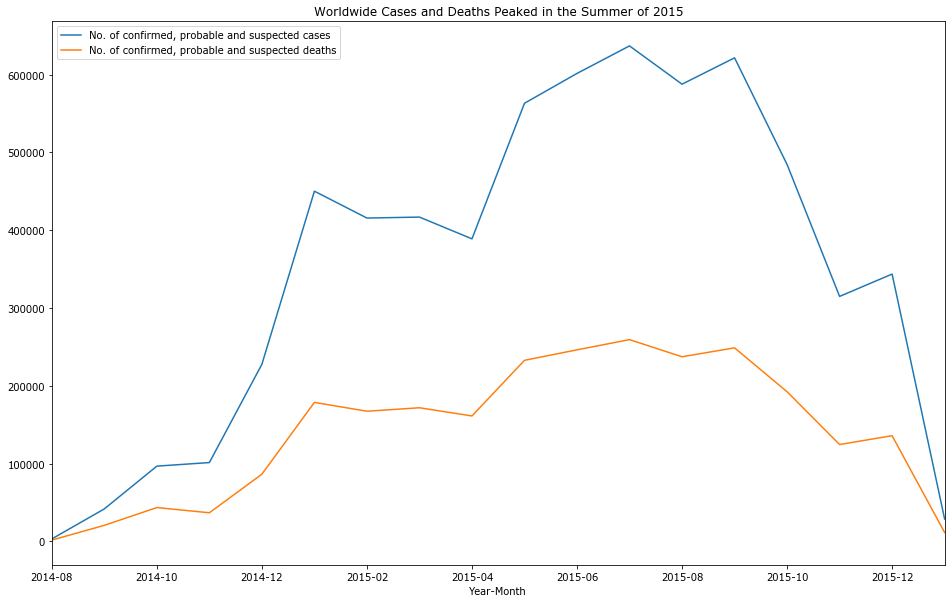

In [366]:
monthly_world_data.plot(
    figsize=(16,10),
    title='Worldwide Cases and Deaths Peaked in the Summer of 2015'
);

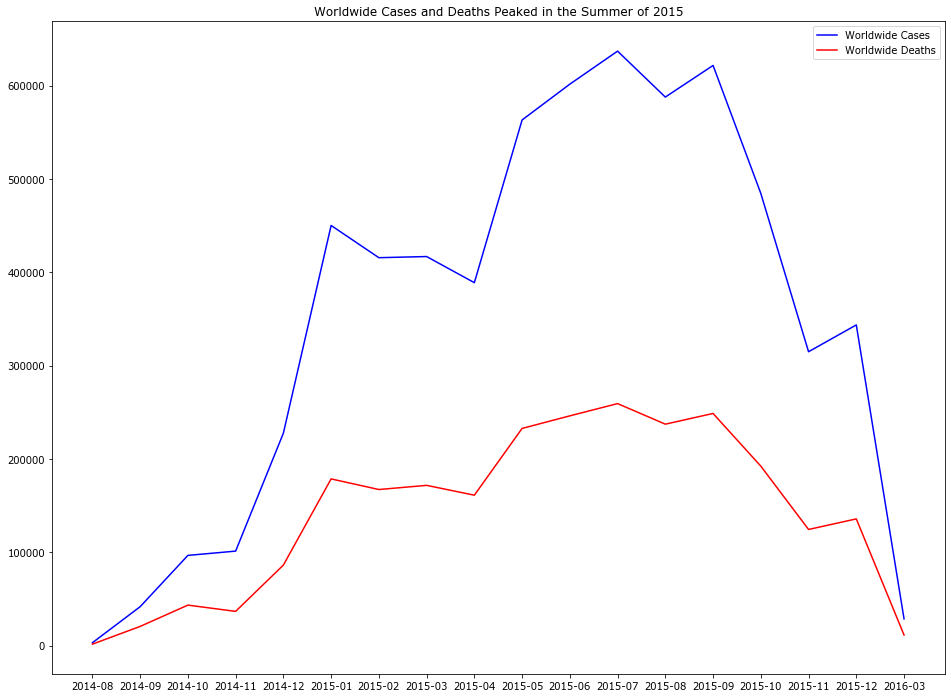

In [381]:
plt.figure(figsize=(16,12))

plt.title('Worldwide Cases and Deaths Peaked in the Summer of 2015')

plt.plot(monthly_world_data['No. of confirmed, probable and suspected cases'], label='Worldwide Cases', color='blue')
plt.plot(monthly_world_data['No. of confirmed, probable and suspected deaths'], label='Worldwide Deaths', color='red')

plt.legend();

In [398]:
# Let's make a few columns showing the change in number of people contracting and dying from Ebola by month
monthly_world_data['Change in Cases'] = monthly_world_data['No. of confirmed, probable and suspected cases'].shift(-1) - monthly_world_data['No. of confirmed, probable and suspected cases']
monthly_world_data['Change in Deaths'] = monthly_world_data['No. of confirmed, probable and suspected deaths'].shift(-1) - monthly_world_data['No. of confirmed, probable and suspected deaths']

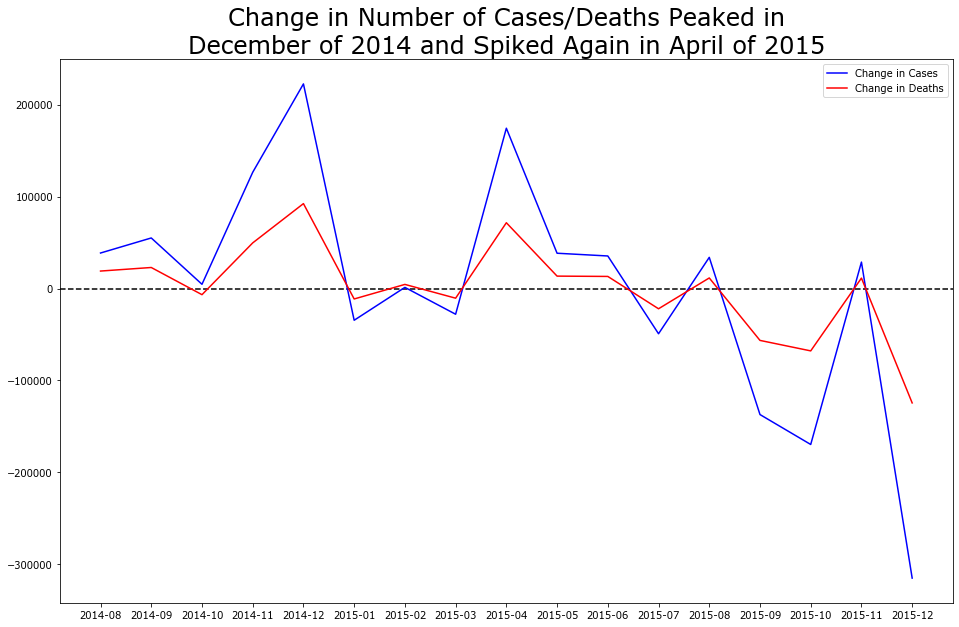

In [407]:
plt.figure(figsize=(16,10))

plt.title('Change in Number of Cases/Deaths Peaked in\nDecember of 2014 and Spiked Again in April of 2015', size=24)

plt.axhline(y=0, xmin=0, xmax=10, color='black', linestyle='dashed')
plt.plot(monthly_world_data['Change in Cases'], color='blue', label='Change in Cases')
plt.plot(monthly_world_data['Change in Deaths'], color='red', label='Change in Deaths')

plt.legend();